# Problem

+ You're given images of handwritten Arabic characters and you're required to recognize the character.



## https://www.kaggle.com/c/arabic-hwr-ai-pro-intake1/overview

## Ranked 21th

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# import seaborn as sns
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

<IPython.core.display.Javascript object>

In [4]:
train_dir = os.path.join("Input/train/")

<IPython.core.display.Javascript object>

In [5]:
df_train = pd.read_csv("data/train.csv")

<IPython.core.display.Javascript object>

In [6]:
df_train.head()

,id,label
0,0,24
1,1,2
2,2,17
3,3,14
4,4,19


<IPython.core.display.Javascript object>

In [7]:
df_train["id_full"] = df_train.id.apply(lambda x: f"{x:05.0f}.png")
df_train["label"] = df_train["label"].astype(str)

<IPython.core.display.Javascript object>

In [8]:
df_train["label"] = df_train["label"].astype(str)

<IPython.core.display.Javascript object>

In [9]:
df_train.head()

,id,label,id_full
0,0,24,00000.png
1,1,2,00001.png
2,2,17,00002.png
3,3,14,00003.png
4,4,19,00004.png


<IPython.core.display.Javascript object>

In [10]:
df_train = (
    df_train.append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
    .append(df_train)
)
len(df_train)

215040

<IPython.core.display.Javascript object>

In [11]:
train_df, validate_df = train_test_split(df_train, test_size=0.02, random_state=42)

train_datagen = ImageDataGenerator(
    rotation_range=5,
    rescale=1.0 / 255,
    zoom_range=0.1,
    shear_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05,
)
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    train_dir,
    x_col="id_full",
    y_col="label",
    target_size=(32, 32),
    class_mode="categorical",
    batch_size=128,
)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_generator = valid_datagen.flow_from_dataframe(
    validate_df,
    train_dir,
    x_col="id_full",
    y_col="label",
    target_size=(32, 32),
    class_mode="categorical",
    batch_size=len(validate_df),
)

Found 210739 validated image filenames belonging to 28 classes.
Found 4301 validated image filenames belonging to 28 classes.


<IPython.core.display.Javascript object>

# This code here is for checking the batch output after augmentation

In [12]:
# for x, y in train_generator:
#     for i in x:
#         plt.imshow(i)
#         plt.show()
#         img = i * 255
#     break

# img = img.reshape(-1, 32, 32, 3)
# print()

<IPython.core.display.Javascript object>

In [13]:
def define_model():
    model = tf.keras.models.Sequential(
        [
            # My Model 20 epock 97.2
            tf.keras.layers.Conv2D(
                filters=32,
                kernel_size=5,
                padding="same",
                activation="relu",
                input_shape=(32, 32, 3),
            ),
            tf.keras.layers.Conv2D(filters=64, kernel_size=5, activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=2),
            tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
            tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=2),
            tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
            tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu"),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(28, activation="softmax"),
        ]
    )

    opt = Adam()
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
    return model

<IPython.core.display.Javascript object>

In [14]:
model = define_model()

<IPython.core.display.Javascript object>

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                    

<IPython.core.display.Javascript object>

In [16]:
early_stopp = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

<IPython.core.display.Javascript object>

In [17]:
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=50,
    callbacks=[early_stopp],
)

Epoch 1/50
1647/1647 [==============================] - 147s 88ms/step - loss: 0.5672 - accuracy: 0.8151 - val_loss: 0.0794 - val_accuracy: 0.9726
Epoch 2/50
1647/1647 [==============================] - 143s 87ms/step - loss: 0.1037 - accuracy: 0.9665 - val_loss: 0.0605 - val_accuracy: 0.9805
Epoch 3/50
1647/1647 [==============================] - 143s 87ms/step - loss: 0.0623 - accuracy: 0.9799 - val_loss: 0.0184 - val_accuracy: 0.9949
Epoch 4/50
1647/1647 [==============================] - 145s 88ms/step - loss: 0.0467 - accuracy: 0.9853 - val_loss: 0.0153 - val_accuracy: 0.9947
Epoch 5/50
1647/1647 [==============================] - 146s 89ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0162 - val_accuracy: 0.9942
Epoch 6/50
1647/1647 [==============================] - 147s 89ms/step - loss: 0.0295 - accuracy: 0.9910 - val_loss: 0.0129 - val_accuracy: 0.9963
Epoch 7/50
1647/1647 [==============================] - 144s 88ms/step - loss: 0.0277 - accuracy: 0.9918 - val_loss: 0

<IPython.core.display.Javascript object>

<AxesSubplot:>

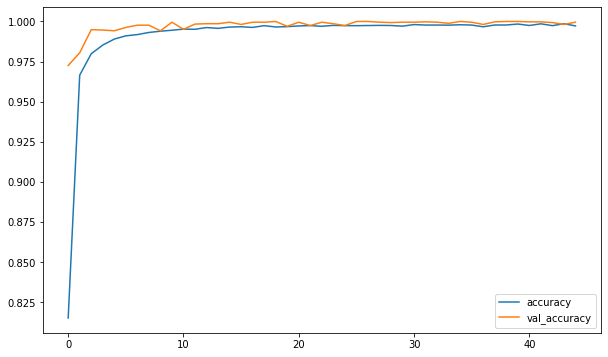

<IPython.core.display.Javascript object>

In [22]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot(figsize=(10, 6))

<AxesSubplot:>

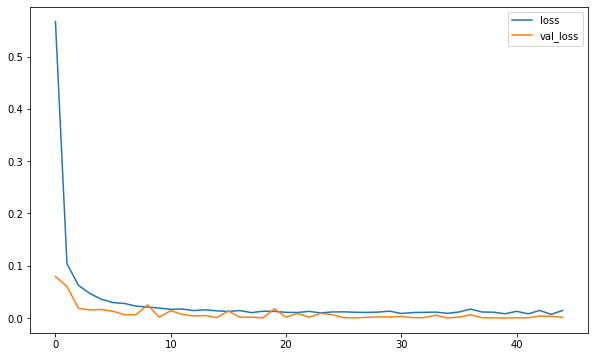

<IPython.core.display.Javascript object>

In [23]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot(figsize=(10, 6))

In [24]:
df_test = pd.read_csv("data/test.csv")
test_dir = os.path.join("Input/test/")

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(32, 32), shuffle=False
)

y_preds_classes = np.argmax(model.predict(test_generator), axis=-1)
y_preds_classes

keys = list(map(int, train_generator.class_indices.keys()))
vals = list(map(int, train_generator.class_indices.values()))

# creating a dict
dict_vals = dict()
for i in range(len(keys)):
    dict_vals[vals[i]] = keys[i]

y_preds_classes = list(y_preds_classes)
y_preds_classes = list(map(lambda x: dict_vals[x], y_preds_classes))
df_test["label"] = y_preds_classes
df_test["id"] = df_test.id.apply(lambda x: f"{x:05.0f}").astype(str)


Found 3360 images belonging to 1 classes.


<IPython.core.display.Javascript object>

In [25]:
df_test = df_test[["id", "label"]]
df_test.set_index("id").to_csv("sub1.csv")

<IPython.core.display.Javascript object>